In [62]:
from analyze_graph import analyze
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [63]:
def read_graphs(path):
    if not os.path.isdir(path):
        raise Exception("path is not a directory")
    graph_paths = [p for p in os.listdir(path) if "visit_graph_" in p]
    return [(p, analyze(json.load(open(os.path.join(path,p))))) for p in graph_paths]

graphs = read_graphs("/home/snagendra/go/src/github.com/zeu5/raft-rl-test/results")

In [64]:
s_key = list(graphs[0][1]["Nodes"].keys())[0]
state = graphs[0][1]["Nodes"][s_key]["State"]
state

{'NodeStates': {'1': {'id': '1',
   'term': 2,
   'vote': '0',
   'commit': 3,
   'lead': '3',
   'raftState': 'StateFollower',
   'applied': 3,
   'progress': {},
   'leadtransferee': '0'},
  '2': {'id': '2',
   'term': 2,
   'vote': '3',
   'commit': 3,
   'lead': '3',
   'raftState': 'StateFollower',
   'applied': 3,
   'progress': {},
   'leadtransferee': '0'},
  '3': {'id': '3',
   'term': 2,
   'vote': '3',
   'commit': 3,
   'lead': '3',
   'raftState': 'StateLeader',
   'applied': 3,
   'progress': {'1': {'match': 0, 'next': 4, 'state': 'StateProbe'},
    '2': {'match': 0, 'next': 4, 'state': 'StateProbe'},
    '3': {'match': 6, 'next': 7, 'state': 'StateReplicate'}},
   'leadtransferee': '0'}}}

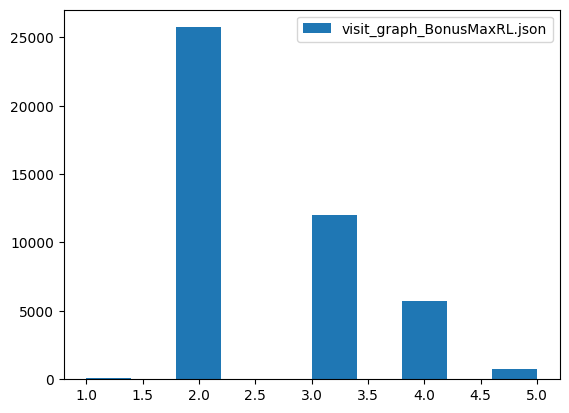

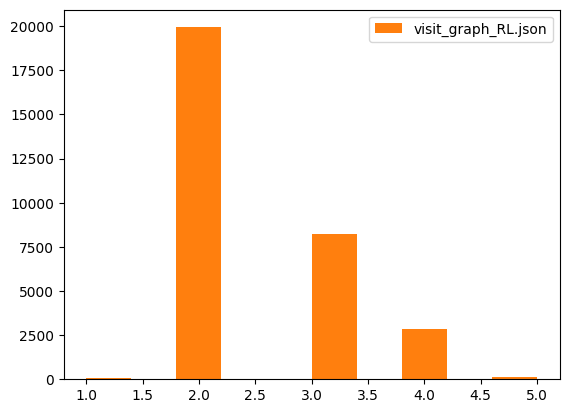

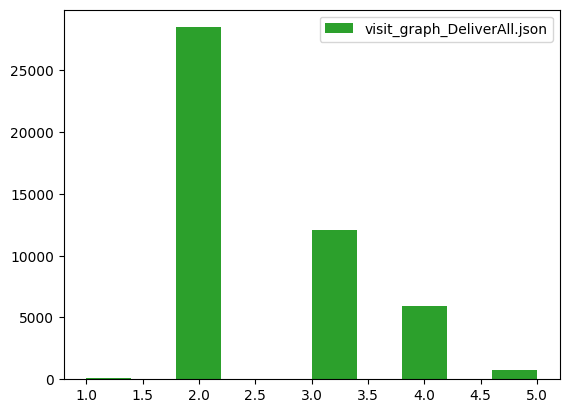

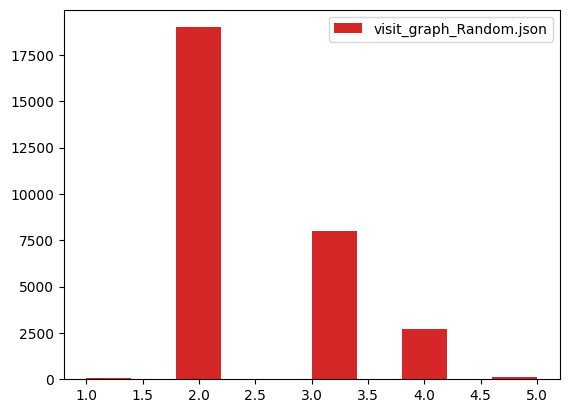

In [65]:
def get_frequencies(graph, state_key):
    frequencies = []
    for node_key, node in graph["Nodes"].items():
        for _, state in node["State"]["NodeStates"].items():
            frequencies.append(state[state_key])
    return np.array(frequencies)

def plot_freq(name, graph, color, state_key):
    terms = get_frequencies(graph, state_key)
    plt.hist(terms, bins=10, label=name, color=color)
    plt.legend()
    plt.show()

def plot_frequencies(graphs, state_key):
    colors = list(mcolors.TABLEAU_COLORS)
    for i in range(len(graphs)):
        (name, graph) = graphs[i]
        plot_freq(name, graph, colors[i], state_key)

plot_frequencies(graphs, "term")
